In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import csv
import emoji
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [2]:
df_data = pd.read_excel("Data_Scraping_FemaleDaily_06032022_with_index.xlsx")

In [3]:
df_data.head()

,Unnamed: 0,reviewer,review,rating,sentimen
0,0,shafiranri,"Membuat make up jadi tahan lama, membuat kulit...",5,positif
1,1,amaliaarumsari,"primer yang hits banget, agak telat nyobainnya...",4,positif
2,2,maryamst,primer silikon based yang bikin wajah super sm...,5,positif
3,3,Virzqia,weewww yes banget buat produk satu ini. sangat...,5,positif
4,4,Aviyanti15,Primer makeup pertama yg aku punya dan cobain ...,4,positif


In [4]:
df_data.drop(index=[41, 82, 119, 139, 199, 213, 216, 236, 243, 276, 278, 317, 351, 379, 407, 444, 608, 707, 886, 945, 946, 1047, 1052, 1076, 1099, 1101, 1126, 1133, 1135, 1149, 1155, 1279, 1419, 1506, 1522, 1535, 1573, 1591, 1611, 1664, 1689, 1725, 1736, 1745, 1756, 1821, 1851, 1870, 1890, 1894, 1906, 1907, 1922, 1956, 1985, 1998, 2141, 2170, 2194, 2197, 2241, 2249, 2258], inplace=True)

In [5]:
df_data.head()

,Unnamed: 0,reviewer,review,rating,sentimen
0,0,shafiranri,"Membuat make up jadi tahan lama, membuat kulit...",5,positif
1,1,amaliaarumsari,"primer yang hits banget, agak telat nyobainnya...",4,positif
2,2,maryamst,primer silikon based yang bikin wajah super sm...,5,positif
3,3,Virzqia,weewww yes banget buat produk satu ini. sangat...,5,positif
4,4,Aviyanti15,Primer makeup pertama yg aku punya dan cobain ...,4,positif


In [6]:
nilai_negatif = df_data['sentimen'].value_counts()[0]
nilai_positif = df_data['sentimen'].value_counts()[1]
persen_negatif = round((nilai_negatif/df_data['sentimen'].count()), 2) * 100
persen_positif = round((nilai_positif/df_data['sentimen'].count()), 2) * 100
hasil = [persen_negatif, persen_positif]

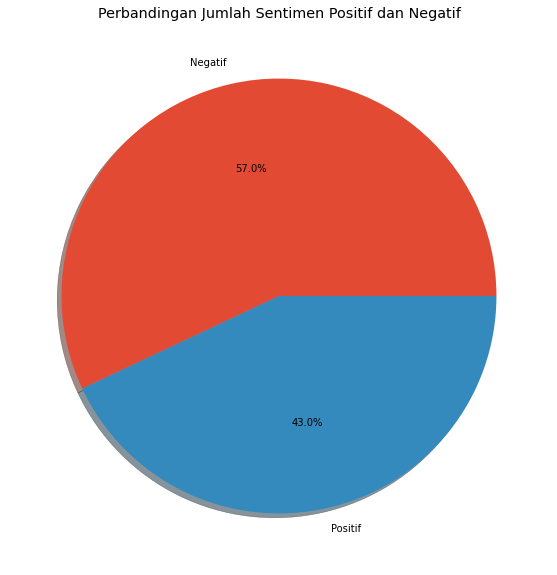

In [7]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14,10))
ax.pie(hasil, labels=['Negatif', 'Positif'], shadow=True, autopct='%1.1f%%')
ax.set_title('Perbandingan Jumlah Sentimen Positif dan Negatif')
plt.show()

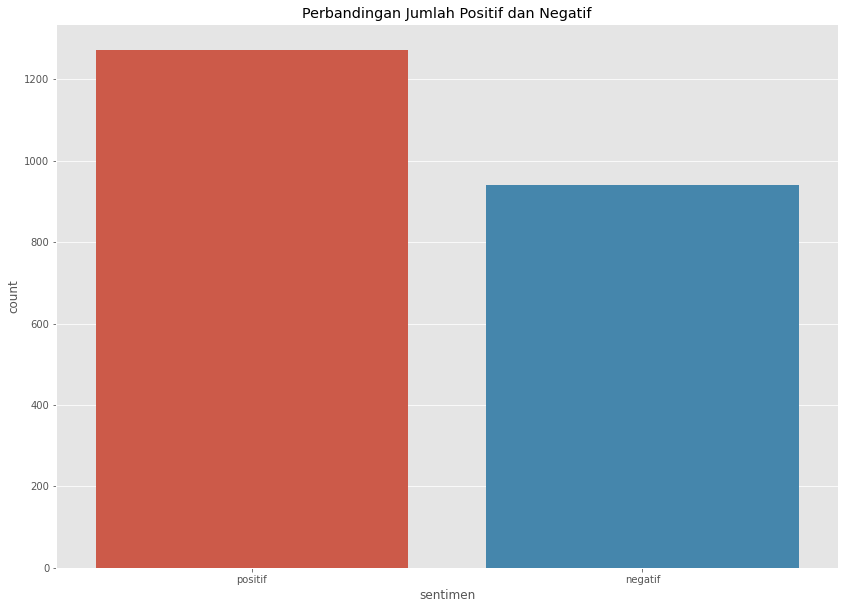

In [8]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14,10))
sns.countplot(x='sentimen', data=df_data)
ax.set_title('Perbandingan Jumlah Positif dan Negatif')
plt.savefig("perbandingan_positif_negatif.png", bbox_inches="tight", dpi=480)
plt.show()

In [9]:
# Fungsi untuk mengulang kata jika terdapat angka 2 dalam kata tersebut
def extract_word_number(text):
    extracted_char = ""
    extra_char = ""
    
    # Check the text length
    if len(text) > 1: 
        # Check if the string contain number 2 as a character
        if "2" in text:
            num_pos = text.index("2")
            # Check if theres another character after number 2 character
            if len(text[(num_pos + 1):]) > 0:
                extra_char = text[(num_pos + 1):]
                extracted_char = [text[num] for num in range(num_pos)]
                extracted_char = ''.join(extracted_char)
                return text.replace(text, "{0} {0}{1}".format(extracted_char, extra_char))
            else:
                extra_char = ""
                extracted_char = [text[num] for num in range(num_pos)]
                extracted_char = ''.join(extracted_char)
                return text.replace(text, "{0} {0}{1}".format(extracted_char, extra_char))
        else:
            return text
    else:
        return text

In [10]:
# Fungsi untuk mengulang kata apabila ada angka 2 dalam bentuk superscript dalam kata
def extract_word_superscript(text):
    extracted_char = ""
    extra_char = ""
    
    # Check the text length
    if len(text) > 1: 
        # Check if the string contain number 2 as a character
        if "\u00b2" in text:
            num_pos = text.index("\u00b2")
            # Check if theres another character after number 2 character
            if len(text[(num_pos + 1):]) > 0:
                extra_char = text[(num_pos + 1):]
                extracted_char = [text[num] for num in range(num_pos)]
                extracted_char = ''.join(extracted_char)
                return text.replace(text, "{0} {0}{1}".format(extracted_char, extra_char))
            else:
                extra_char = ""
                extracted_char = [text[num] for num in range(num_pos)]
                extracted_char = ''.join(extracted_char)
                return text.replace(text, "{0} {0}{1}".format(extracted_char, extra_char))
        else:
            return text
    else:
        return text

In [11]:
# Fungsi untuk menyamakan kata makeup dalam kalimat
def make_up_replace(text):
    if "make up" in text:
        return text.replace("make up", "makeup")
    elif "make upin" in text:
        return text.replace("make upin", "makeup")
    elif "make upnya" in text:
        return text.replace("make upnya", "makeup")
    elif "make-up" in text:
        return text.replace("make-up", "makeup")
    elif "dimakeup" in text:
        return text.replace("dimakeup", "makeup")
    elif "dimakeupin" in text:
        return text.replace("dimakeupin", "makeup")
    elif "makeupnya" in text:
        return text.replace("makeupnya", "makeup")
    elif "makeupny" in text:
        return text.replace("makeupny", "makeup")
    elif "makeupku" in text:
        return text.replace("makeupku", "makeup")
    elif "mekap" in text:
        return text.replace("mekap", "makeup")
    elif "makeuonya" in text:
        return text.replace("makeuonya", "makeup")
    else:
        return text

In [12]:
# Fungsi untuk menyamakan kata tzone dalam kalimat
def t_zone_replace(text):
    if "t zone" in text:
        return text.replace("t zone", "tzone")
    elif "t z" in text:
        return text.replace("t z", "tzone")
    elif "t zonenya" in text:
        return text.replace("t zonenya", "tzone")
    else:
        return text

In [13]:
# Fungsi untuk menyamakan kata bbceam dalam kalimat
def bb_cream_replace(text):
    if "bb cream" in text:
        return text.replace("bb cream", "bbcream")
    else:
        return text    

In [14]:
# Fungsi untuk menyamakan kata cccream dalam kalimat
def cc_cream_replace(text):
    if "cc cream" in text:
        return text.replace("cc cream", "cccream")
    else:
        return text    

In [15]:
# Fungsi untuk menyamakan kata dceram dalam kalimat
def dd_cream_replace(text):
    if "dd cream" in text:
        return text.replace("dd cream", "ddcream")
    else:
        return text    

In [16]:
# Fungsi untuk menyamakan kata touchup dalam kalimat
def touch_up_replace(text):
    if "touch up" in text:
        return text.replace("touch up", "touchup")
    elif "ngeretouch" in text:
        return text.replace("ngeretouch", "touchup")
    else:
        return text

In [17]:
# Fungsi untuk menyamakan kata breakout dalam kalimat
def break_out_replace(text):
    if "break out" in text:
        return text.replace("break out", "breakout")
    else:
        return text

In [18]:
# Fungsi untuk menyamakan kata skincare dalam kalimat
def skin_care_replace(text):
    if "skin care" in text:
        return text.replace("skin care", "skincare")
    else:
        return text

In [19]:
# Fungsi untuk menyamakan kata sunscreen dalam kalimat
def sun_screen_replace(text):
    if "sun screen" in text:
        return text.replace("sun screen", "sunscreen")
    elif "sunscreenku" in text:
        return text.replace("sunscreenku", "sunscreen")
    else:
        return text

In [20]:
# Fungsi untuk mengubah seluruh karakter dalam kalimat menjadi huruf kecil (lowercase)
def case_folding(message):
    return message.lower()

In [21]:
# Fungsi untuk menghapus tanda baca dalam kalimat
def del_punctuation(message):
    for punc in string.punctuation:
        if punc in message:
            message = message.replace(punc, ' ')
    return message

In [22]:
# Fungsi untuk menghapus angka dalam kalimat
def del_number(message):
    regex = r'\d+'
    return ' '.join(re.sub(regex, "", message).split())

In [23]:
# Fungsi untuk menghapus emotikon dalam kalimat
def del_emoticon(message):
    return emoji.replace_emoji(message, replace=' ')

In [24]:
# Fungsi untuk menghapus kata dengan jumlah huruf yang lebih dari satu dan berdekatan 
def remove_repeated_char(text):
    return re.sub(r'(\w)\1+', r'\1', text)

In [25]:
# Fungsi untuk mengubah kata yang menggunakan angka untuk membuat kata berulang
def replace_repeat_word_num(message):
    split_msg = [word.replace(word, extract_word_number(word)) for word in message.split()]
    return " ".join(split_msg)

In [26]:
# Fungsi untuk mengubah kata yang menggunakan angka dalam bentuk superscript untuk membuat kata berulang
def replace_repeat_word_superscript(message):
    split_msg = [word.replace(word, extract_word_superscript(word)) for word in message.split()]
    return " ".join(split_msg)

In [27]:
# Fungsi untuk mengubah kata yang memiliki karakter yang sama dan berdekatan dengan jumlah lebih dari satu dalam kalimat
def normalisasi_kata_redundan(message):
    return remove_repeated_char(message)

In [28]:
# Memuat Daftar kata dengan jumlah huruf yang sama lebih dari satu dan berdekatan
reader_kata_dua_karakter = csv.reader(open(r"D:/Bagoes/Jupyter/Data/kata_dua_karakter.csv", "r"))

dict_kata_dua_karakter = {row[0]:row[1] for row in reader_kata_dua_karakter if row and row[0]}

In [29]:
# Memuat daftar kata istilah asing yang tediri dari satu kata
reader_satu_kata = csv.reader(open(r"D:/Bagoes/Jupyter/Data/translasi_satu_kata.csv", "r"))

dict_translasi_satu_kata = {row[0]:row[1] for row in reader_satu_kata if row and row[0]}

In [30]:
# Memuat daftar kalimat dengan istilah asing
reader_lebih_satu_kata = csv.reader(open(r"D:/Bagoes/Jupyter/Data/translasi_lebih_satu_kata.csv", "r"))

result_lebih_satu_kata = {row[0]:row[1] for row in reader_lebih_satu_kata if row and row[0]}

# Mengurutkan daftar kalimat istilah asing sesuai dengan panjang kalimat

# sorting using sorted()
# lambda fnc. to render logic 
list_lebih_satu_kata = sorted(list(result_lebih_satu_kata.items()), key = lambda key : len(key[0]), reverse=True)

# reordering corpus dictionary translasi bahasa lebih satu kata
dict_lebih_satu_kata = {val[0] : val[1] for val in list_lebih_satu_kata}

In [31]:
# Memuat daftar kata bahasa alay
df_kamus_bahasa_alay = pd.read_csv("colloquial-indonesian-lexicon.csv")

# Membuat Kamus Bahasa Alay
list_kata_slang = []

for kata_slang in df_kamus_bahasa_alay["slang"]:
    list_kata_slang.append(kata_slang)

list_kata_formal = []

for kata_formal in df_kamus_bahasa_alay["formal"]:
    list_kata_formal.append(kata_formal)

dict_bahasa_alay = {}

for key, value in zip(df_kamus_bahasa_alay["slang"], df_kamus_bahasa_alay["formal"]):
    if dict_bahasa_alay.get(key) == None:
        dict_bahasa_alay.update({key:value})

In [32]:
# Memuat daftar kata yang mengandung typo (salah dalam penulisan)
reader_koreksi_kata = csv.reader(open(r"D:/Bagoes/Jupyter/Data/koreksi_kata.csv", "r"))

dict_koreksi_kata = {row[0]:row[1] for row in reader_koreksi_kata if row and row[0]}

In [33]:
# Memuat daftar kata yang merupakan stopwords (kata redundan)
factory = StopWordRemoverFactory()
stopwords_indonesia = factory.get_stop_words()

In [34]:
# Fungsi untuk memeriksa apakah token terdapat dalam daftar kata dengan dua karakter yang sama berjumlah lebih dari satu dan berdekatan
def check_kata_dua_karakter(text):
    for key, val in dict_kata_dua_karakter.items():
        if text == key:
            text = text.replace(text, dict_kata_dua_karakter.get(key))
    return text

In [35]:
# Fungsi untuk memeriksa apakah token terdapat dalam daftar kata yang akan di translasi
def check_translasi_satu_kata(text):
    for key, val in dict_translasi_satu_kata.items():
        if text == key:
            text = text.replace(text, dict_translasi_satu_kata.get(key))
    return text

In [36]:
# Fungsi untuk memeriksa apakah token terdapat dalam daftar kata yang memiliki typo (salah penulisan)
def check_koreksi_kata(text):
    for key, val in dict_koreksi_kata.items():
        if text == key:
            text = text.replace(text, dict_koreksi_kata.get(key))
    return text

In [37]:
# Fungsi untuk memeriksa apakah token terdapat dalam daftar kata slang (alay)
def check_kata_alay(text):
    for key, val in dict_bahasa_alay.items():
        if text == key:
            text = text.replace(text, dict_bahasa_alay.get(key))
    return text

In [38]:
# Fungsi untuk melakukan normalisasi kalimat menggunakan daftar kata dengan dua karakter yang sama berjumlah lebih dari satu dan berdekatan
def normalisasi_kata_dua_karakter(message):
    split_text = [check_kata_dua_karakter(text) for text in message.split()]
    return " ".join(split_text)

In [39]:
# Fungsi untuk melakukan normalisasi kalimat menggunakan daftar kalimat yang akan di translasi
def normalisasi_translasi_kalimat(message):
    for key, val in dict_lebih_satu_kata.items():
        if key in message:
            message = message.replace(key, dict_lebih_satu_kata.get(key))
    return message  

In [40]:
# Fungsi untuk melakukan normalisasi kalimat menggunakan daftar kata yang akan di translasi
def normalisasi_translasi_kata(message):
    split_text = [check_translasi_satu_kata(text) for text in message.split()]
    return " ".join(split_text)

In [41]:
# Fungsi untuk melakukan normalisasi kalimat menggunakan daftar kata yang memiliki typo (salah penulisan)
def normalisasi_koreksi_kata(message):
    split_text = [check_koreksi_kata(text) for text in message.split()]
    return " ".join(split_text)

In [42]:
# Fungsi untuk melakukan normalisasi kalimat menggunakan daftar kata slang (alay)
def normalisasi_kata_alay(message):
    split_text = [check_kata_alay(text) for text in message.split()]
    return " ".join(split_text)

In [43]:
# Fungsi untuk menghapus stopwords menggunakan daftar stopwords
def del_stopwords(message):
    split_text = [text for text in message.split() if text not in stopwords_indonesia]
    return " ".join(split_text)

In [44]:
# Memuat Stemmer
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

# Fungsi untuk melakukan stemming
def stem_words(message):
    split_text = [stemmer.stem(text) for text in message.split()]
    return " ".join(split_text)

In [45]:
# Membuat mapping untuk label data
label = {'positif' : 1, 'negatif' : 2}

In [46]:
df_data["sentimen"].unique()

array(['positif', 'negatif'], dtype=object)

In [47]:
# Melakukan tahapan preprocessing
# 1. Case Folding
df_data['review'] = df_data['review'].apply(case_folding)
# 2. Delete Punctuation
df_data['review'] = df_data['review'].apply(del_punctuation)
# 3. Delete Emoticon
df_data['review'] = df_data['review'].apply(del_emoticon)
# 4. Normalisasi Kata Makeup
df_data['review'] = df_data['review'].apply(make_up_replace)
# 5. Normalisasi Kata TZone
df_data['review'] = df_data['review'].apply(t_zone_replace)
# 6. Normalisasi Kata BBCream
df_data['review'] = df_data['review'].apply(bb_cream_replace)
# 7. Normalisasi Kata CCCream
df_data['review'] = df_data['review'].apply(cc_cream_replace)
# 8. Normalisasi Kata DDCream
df_data['review'] = df_data['review'].apply(dd_cream_replace)
# 9. Normalisasi Kata Touchup
df_data['review'] = df_data['review'].apply(touch_up_replace)
# 10. Normalisasi Kata Breakout
df_data['review'] = df_data['review'].apply(break_out_replace)
# 11. Normalisasi Kata Skin Care
df_data['review'] = df_data['review'].apply(skin_care_replace)
# 12. Normalisasi Kata Sun Screen
df_data['review'] = df_data['review'].apply(sun_screen_replace)
# 13. Normalisasi Kata Berulang Dengan Angka
df_data['review'] = df_data['review'].apply(replace_repeat_word_num)
# 14. Normalisasi Kata Berulang Dengan Angka (Superscript)
df_data['review'] = df_data['review'].apply(replace_repeat_word_superscript)
# 15. Delete Number
df_data['review'] = df_data['review'].apply(del_number)
# 16. Normalisasi Kata Dua Karakter Berjumlah Lebih Dari Satu dan Berdekatan
df_data['review'] = df_data['review'].apply(remove_repeated_char)
df_data['review'] = df_data['review'].apply(normalisasi_kata_dua_karakter)
# 17. Normalisasi Translasi Kalimat
df_data['review'] = df_data['review'].apply(normalisasi_translasi_kalimat)
# 18. Normalisasi Translasi Kata
df_data['review'] = df_data['review'].apply(normalisasi_translasi_kata)
# 19. Normalisasi Koreksi Kata
df_data['review'] = df_data['review'].apply(normalisasi_koreksi_kata)
# 20. Normalisasi Kata Slang (Alay)
df_data['review'] = df_data['review'].apply(normalisasi_kata_alay)
# 21. Delete Stopwords
df_data['review'] = df_data['review'].apply(del_stopwords)
# 22. Normalisasi Kata (Stemming)
df_data['review'] = df_data['review'].apply(stem_words)
# 23. Normalisasi Label Data
df_data["sentimen"] = df_data["sentimen"].map(label)

In [48]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df_data['review'], 10)
for word, freq in common_words:
    print(word, freq)
df_after_stopwords = pd.DataFrame(common_words, columns = ['review', 'count'])

pori 4583
pakai 2885
banget 1828
primer 1750
sih 1529
minyak 1478
bikin 1399
kulit 1393
makeup 1268
muka 1059


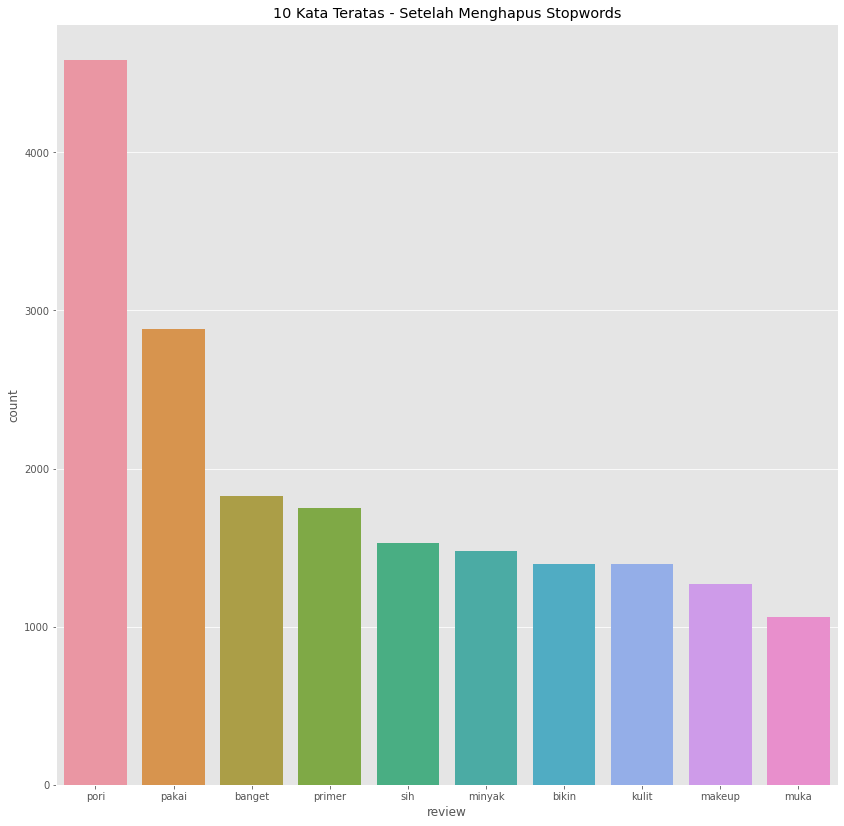

In [49]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14, 14))
sns.barplot(x='review', y='count', data=df_after_stopwords)
ax.set_title('10 Kata Teratas - Setelah Menghapus Stopwords')
plt.savefig("10_kata_teratas_setelah_stopwords.png", bbox_inches="tight", dpi=480)
plt.show()

In [50]:
df_data_aksen = pd.read_excel("Data_Scraping_FemaleDaily_06032022_with_index.xlsx")

In [51]:
df_data_aksen.drop(index=[41, 82, 119, 139, 199, 213, 216, 236, 243, 276, 278, 317, 351, 379, 407, 444, 608, 707, 886, 945, 946, 1047, 1052, 1076, 1099, 1101, 1126, 1133, 1135, 1149, 1155, 1279, 1419, 1506, 1522, 1535, 1573, 1591, 1611, 1664, 1689, 1725, 1736, 1745, 1756, 1821, 1851, 1870, 1890, 1894, 1906, 1907, 1922, 1956, 1985, 1998, 2141, 2170, 2194, 2197, 2241, 2249, 2258], inplace=True)

In [52]:
before_stopwords = get_top_n_bigram(df_data_aksen['review'], 10)
for word, freq in before_stopwords:
    print(word, freq)
df_before_stopwords = pd.DataFrame(before_stopwords, columns=['review', 'count'])

ini 3199
aku 2990
pori 2434
dan 2349
di 1935
primer 1683
jadi 1502
ga 1370
bikin 1359
yang 1344


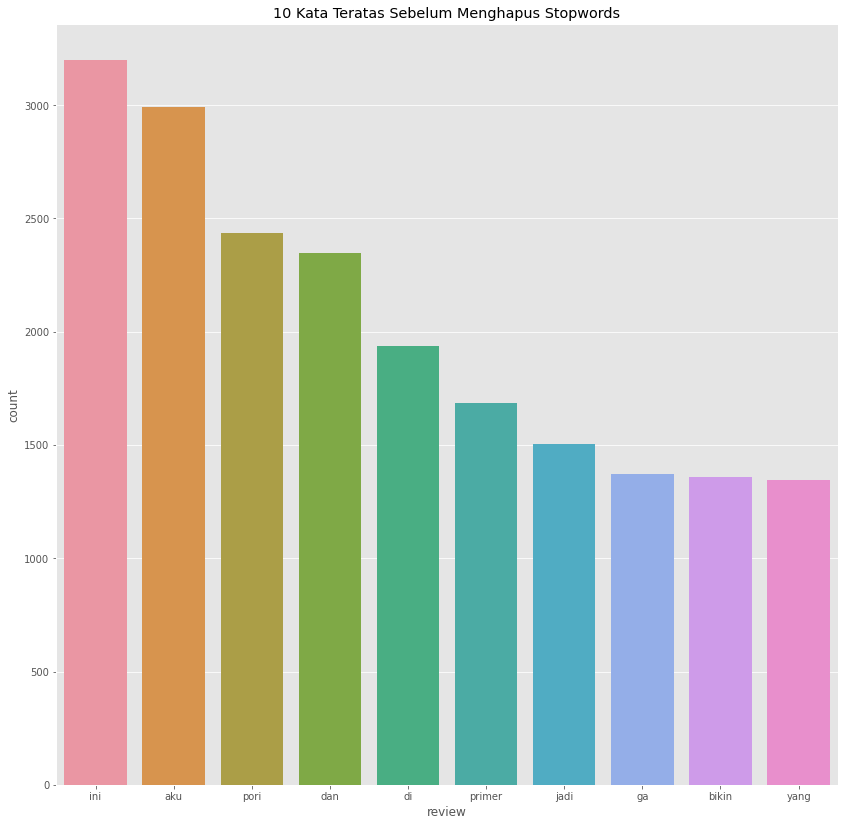

In [53]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14,14))
sns.barplot(x='review', y='count', data=df_before_stopwords)
ax.set_title('10 Kata Teratas Sebelum Menghapus Stopwords')
plt.savefig("10_kata_teratas_sebelum_stopwords.png", bbox_inches="tight", dpi=480)
plt.show()